In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, local, tools_cmb, binning as bn, plottools as pl
from matplotlib.pyplot import *

In [5]:
qid_dn = ['comb_d','comb_n']
qids = qid_dn + ['diff_dn','comb_dn']
qids = qid_dn
#qids = ['diff_dn']

In [6]:
aobj = {q: local.init_analysis_params(qid=q,ascale=3.,wtype='com16v3pt') for q in qids}

In [7]:
mcl = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1]*local.Tcmb**2 for q in qids}
ncl = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1]*local.Tcmb**2 for q in qids}
ocl = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1]*local.Tcmb**2 for q in qids}

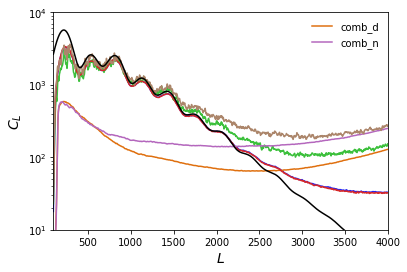

In [8]:
for q in qid_dn:
    pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e4,xmin=100,xmax=4000)
    l = aobj[q].l
    s = l**2/np.pi/2.
    plot(l,s*(mcl[q]-ncl[q]))
    plot(l,s*ncl[q],label=q)
    plot(l,s*ocl[q])
#plot(l,s*(ocl['comb_n']-ocl['comb_d']))
plot(l,s*aobj[q].lcl[0,:]*local.Tcmb**2,color='k')
legend()

In [8]:
mask = tools_cmb.load_window_curvedsky(aobj['diff_dn'])
w2 = tools_cmb.get_wfactor(mask)[2]

wfactors: [1.99035681e-02 1.17988937e-06 8.74268232e-11 6.89972364e-15
 5.64587096e-19]


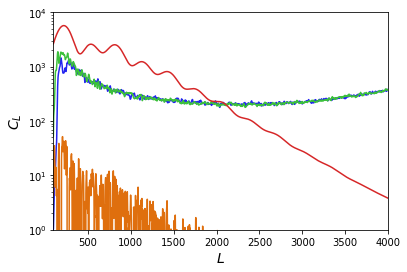

In [9]:
pl.plot_1dstyle(ylog=True,ymin=1,ymax=1e4,xmin=100,xmax=4000)
q = 'diff_dn'
l = aobj[q].l
s = l**2/np.pi/2.
#plot(l,s*mcl[q]/w2)
plot(l,s*ncl[q]/w2)
#plot(l,s*ncl['comb_d'])
plot(l,s*(mcl[q]-ncl[q])/w2)
plot(l,s*ocl[q]/w2)
plot(l,s*aobj[q].lcl[0,:]*local.Tcmb**2)

#### All boss combined map

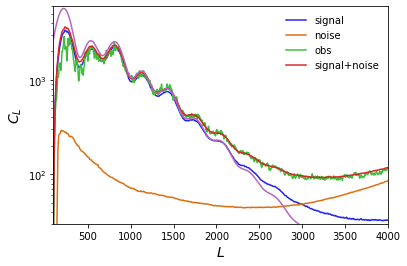

In [20]:
q = 'comb_dn'
pl.plot_1dstyle(ylog=True,ymin=3e1,ymax=6e3,xmin=100,xmax=4000)
l = aobj[q].l
s = l**2/np.pi/2.
plot(l,s*(mcl[q]-ncl[q]),label='signal')
plot(l,s*ncl[q],label='noise')
plot(l,s*ocl[q],label='obs')
plot(l,s*mcl[q],label='signal+noise')
plot(l,s*aobj[q].lcl[0,:]*local.Tcmb**2)
legend()

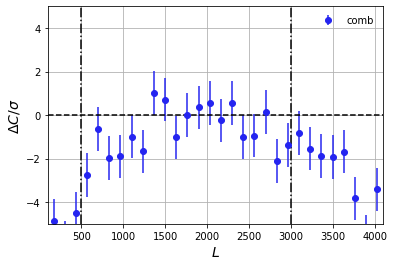

In [25]:
mb = bn.multipole_binning(30,lmin=100,lmax=4096)
pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-5,ymax=5,ylab=r'$\Delta C/\sigma$')
mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj['comb_dn'].fcls['c'][:101],cn=1)
errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label='comb')
axhline(0.,ls='--',color='k')
axvline(500,ls='-.',color='k')
axvline(3000,ls='-.',color='k')
legend()
show()

#### Each Diff Map

In [9]:
dqids = [1,2,3,4]
#w2 = 0.016
w2 = 0.009
#dqids = [1]
aobj_d = {q: local.init_analysis_params(qid='diff_boss_0'+str(q)+'',ascale=5.0) for q in dqids}
mcl_d = {q: (np.loadtxt(aobj_d[q].fcls['c'][10])).T[1]*local.Tcmb**2/w2 for q in dqids}
ncl_d = {q: (np.loadtxt(aobj_d[q].fcls['n'][10])).T[1]*local.Tcmb**2/w2 for q in dqids}
ocl_d = {q: (np.loadtxt(aobj_d[q].fcls['c'][0])).T[1]*local.Tcmb**2/w2 for q in dqids}

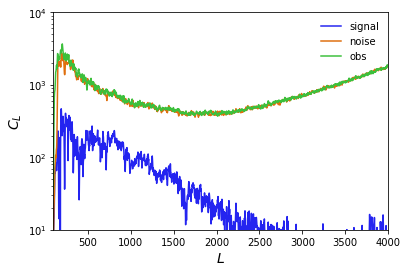

In [9]:
pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e4,xmin=100,xmax=4000)
l = aobj_d[1].l
s = l**2/np.pi/2.
plot(l,s*(mcl_d[3]-ncl_d[3]),label='signal')
plot(l,s*mcl_d[3],label='noise')
plot(l,s*ocl_d[3],label='obs')
legend()

#### Check obs - sim

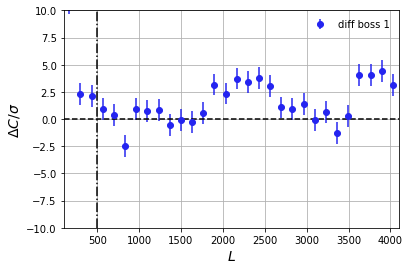

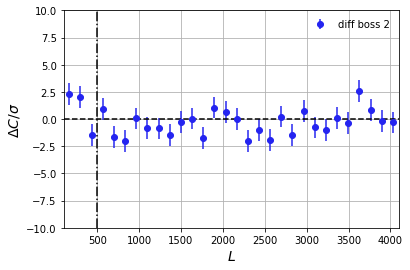

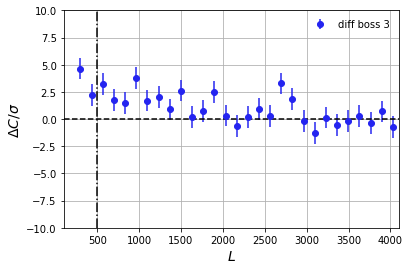

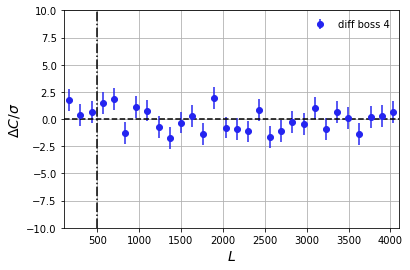

In [10]:
mb = bn.multipole_binning(30,lmin=100,lmax=4096)
s = mb.bc**3.5
for i in dqids:
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-10,ymax=10,ylab=r'$\Delta C/\sigma$')
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj_d[i].fcls['c'][:101],cn=1)
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label='diff boss '+str(i))
    axhline(0.,ls='--',color='k')
    axvline(500,ls='-.',color='k')
    legend()
    show()

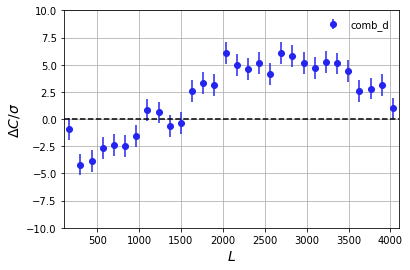

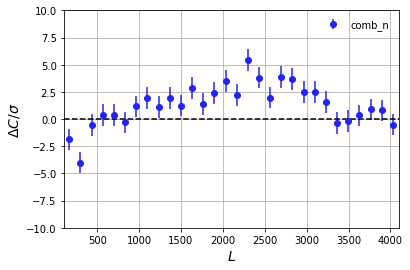

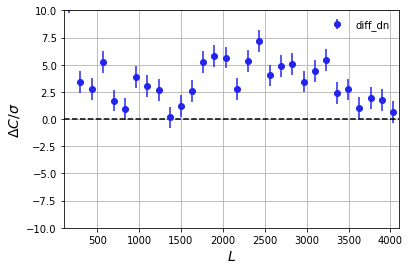

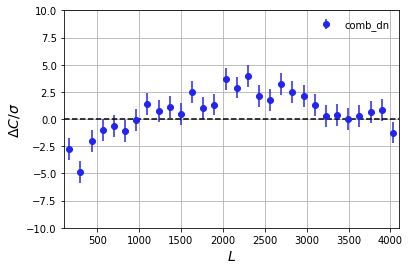

In [11]:
for q in qids:
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-10,ymax=10,ylab=r'$\Delta C/\sigma$')
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj[q].fcls['c'][:101],cn=1)
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=q)
    axhline(0.,ls='--',color='k')
    legend()
    show()